In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as pt 
import seaborn as sn 

In [88]:
data = pd.read_csv("G:\Projects\Sales Forecast\Train.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\User\AppData\Local\Temp\ipykernel_3848\874889678.py:1: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv("G:\Projects\Sales Forecast\Train.csv")


In [89]:
data.shape

(18483, 10)

In [90]:
data.head(10)

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
0,26/09/24,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0
1,26/09/24,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0
2,26/09/24,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0
3,26/09/24,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0
4,22/09/24,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0
5,22/09/24,Automotive,BrandA,6,1,82.2,321.07,46.44,137.60,448.0
6,22/09/24,Automotive,BrandA,6,1,19.0,263.28,12.41,418.70,31.0
7,18/09/24,Automotive,BrandA,2,0,81.4,454.74,20.18,135.07,135.0
8,10/09/24,Automotive,BrandA,1,0,13.3,81.31,42.01,255.84,349.0
9,10/09/24,Automotive,BrandA,1,0,28.4,194.20,15.18,323.72,276.0


In [5]:
data.tail(10)

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
18473,14/03/21,Toys,BrandF,6,1,45.7,140.75,27.72,347.44,10.0
18474,14/03/21,Toys,BrandF,6,1,31.9,166.68,20.43,313.72,142.0
18475,10/03/21,Toys,BrandF,2,0,11.7,448.05,10.66,125.97,240.0
18476,10/03/21,Toys,BrandF,2,0,42.6,164.52,36.34,450.79,300.0
18477,06/03/21,Toys,BrandF,5,0,58.2,313.53,33.26,134.03,183.0
18478,18/02/21,Toys,BrandF,3,0,22.0,266.55,18.33,383.05,359.0
18479,10/02/21,Toys,BrandF,2,0,48.4,481.87,23.41,469.83,333.0
18480,02/02/21,Toys,BrandF,1,0,50.7,123.81,46.73,214.11,132.0
18481,25/01/21,Toys,BrandF,0,0,73.4,77.95,10.07,82.28,274.0
18482,21/01/21,Toys,BrandF,3,0,5.1,473.60,6.21,427.60,350.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  18483 non-null  object 
 1   Category              18483 non-null  object 
 2   Brand                 18483 non-null  object 
 3   Day_of_Week           18483 non-null  int64  
 4   Holiday_Indicator     18483 non-null  int64  
 5   Past_Purchase_Trends  18483 non-null  float64
 6   Price                 18483 non-null  float64
 7   Discount              18483 non-null  float64
 8   Competitor_Price      18483 non-null  float64
 9   Sales_Quantity        18019 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.4+ MB


We'll have to change the date column's datatype

In [7]:
data.describe()

,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
count,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18019.000000
mean,2.991235,0.142022,52.329465,275.111184,27.490937,259.858758,255.665631
std,2.000765,0.349083,27.410577,129.733609,13.022521,126.653165,141.179795
min,0.000000,0.000000,5.000000,50.070000,5.000000,40.070000,10.000000
25%,1.000000,0.000000,28.900000,163.315000,16.265000,149.530000,133.500000
50%,3.000000,0.000000,52.500000,275.150000,27.600000,260.260000,257.000000
75%,5.000000,0.000000,75.700000,387.650000,38.690000,368.520000,377.000000
max,6.000000,1.000000,100.000000,499.900000,49.990000,479.990000,499.000000


In [8]:
data["Category"].value_counts()

Category
Beauty         2382
Clothing       2361
Sports         2321
Toys           2315
Automotive     2313
Books          2299
Home           2252
Electronics    2240
Name: count, dtype: int64

In [9]:
data["Category"].unique()

array(['Automotive', 'Beauty', 'Books', 'Clothing', 'Electronics', 'Home',
       'Sports', 'Toys'], dtype=object)

In [10]:
data["Brand"].value_counts()

Brand
BrandE    3149
BrandA    3148
BrandF    3145
BrandD    3027
BrandB    3007
BrandC    3007
Name: count, dtype: int64

In [11]:
data["Brand"].unique()

array(['BrandA', 'BrandB', 'BrandC', 'BrandD', 'BrandE', 'BrandF'],
      dtype=object)

There are 8 categories and 6 Brands

In [12]:
data["Day_of_Week"].value_counts()

Day_of_Week
3    2679
0    2679
6    2625
2    2625
1    2625
4    2625
5    2625
Name: count, dtype: int64

In [13]:
data["Holiday_Indicator"].value_counts()

Holiday_Indicator
0    15858
1     2625
Name: count, dtype: int64

In [14]:
data.duplicated().value_counts()

False    18483
Name: count, dtype: int64

In [15]:
data.isna().sum()

Date                      0
Category                  0
Brand                     0
Day_of_Week               0
Holiday_Indicator         0
Past_Purchase_Trends      0
Price                     0
Discount                  0
Competitor_Price          0
Sales_Quantity          464
dtype: int64

There are null values in the Sales_Quantity column

In [93]:
data["Date"] = pd.to_datetime(data["Date"])

C:\Users\User\AppData\Local\Temp\ipykernel_3848\2487158108.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"] = pd.to_datetime(data["Date"])


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18483 non-null  datetime64[ns]
 1   Category              18483 non-null  object        
 2   Brand                 18483 non-null  object        
 3   Day_of_Week           18483 non-null  int64         
 4   Holiday_Indicator     18483 non-null  int64         
 5   Past_Purchase_Trends  18483 non-null  float64       
 6   Price                 18483 non-null  float64       
 7   Discount              18483 non-null  float64       
 8   Competitor_Price      18483 non-null  float64       
 9   Sales_Quantity        18019 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 1.4+ MB


In [18]:
data.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
0,2024-09-26,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0
1,2024-09-26,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0
2,2024-09-26,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0
3,2024-09-26,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0
4,2024-09-22,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0


In [95]:
data["year"] = data.Date.dt.year


In [96]:
data["month"] = data.Date.dt.month
data["day"] = data.Date.dt.day
data["quarter"] = data.Date.dt.quarter
data["is_month_start"] = data.Date.dt.is_month_start
data["is_month_end"] = data.Date.dt.is_month_end
data["is_year_end"] = data.Date.dt.is_year_end

In [97]:
data.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,year,month,day,quarter,is_month_start,is_month_end,is_year_end
0,2024-09-26,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0,2024,9,26,3,False,False,False
1,2024-09-26,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0,2024,9,26,3,False,False,False
2,2024-09-26,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0,2024,9,26,3,False,False,False
3,2024-09-26,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0,2024,9,26,3,False,False,False
4,2024-09-22,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0,2024,9,22,3,False,False,False


In [98]:
data["Difference"] = data.Price - data.Competitor_Price

In [100]:
data.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,year,month,day,quarter,is_month_start,is_month_end,is_year_end,Difference
0,2024-09-26,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0,2024,9,26,3,False,False,False,102.85
1,2024-09-26,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0,2024,9,26,3,False,False,False,271.81
2,2024-09-26,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0,2024,9,26,3,False,False,False,-170.26
3,2024-09-26,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0,2024,9,26,3,False,False,False,325.04
4,2024-09-22,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0,2024,9,22,3,False,False,False,-256.31


In [101]:
data["year"].value_counts()

year
2022    5005
2023    4967
2021    4785
2024    3726
Name: count, dtype: int64

In [25]:
data["month"].value_counts()

month
6     1695
5     1642
9     1638
8     1638
4     1589
3     1586
1     1532
7     1532
2     1531
12    1423
10    1420
11    1257
Name: count, dtype: int64

In [26]:
data["is_month_end"].value_counts()

is_month_end
False    17826
True       657
Name: count, dtype: int64

In [27]:
data["is_month_start"].value_counts()

is_month_start
False    17991
True       492
Name: count, dtype: int64

In [28]:
data["is_year_end"].value_counts()

is_year_end
False    18428
True        55
Name: count, dtype: int64

In [29]:
data["quarter"].value_counts()

quarter
2    4926
3    4808
1    4649
4    4100
Name: count, dtype: int64

Univariate Analysis

In [102]:
data.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,year,month,day,quarter,is_month_start,is_month_end,is_year_end,Difference
0,2024-09-26,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0,2024,9,26,3,False,False,False,102.85
1,2024-09-26,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0,2024,9,26,3,False,False,False,271.81
2,2024-09-26,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0,2024,9,26,3,False,False,False,-170.26
3,2024-09-26,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0,2024,9,26,3,False,False,False,325.04
4,2024-09-22,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0,2024,9,22,3,False,False,False,-256.31


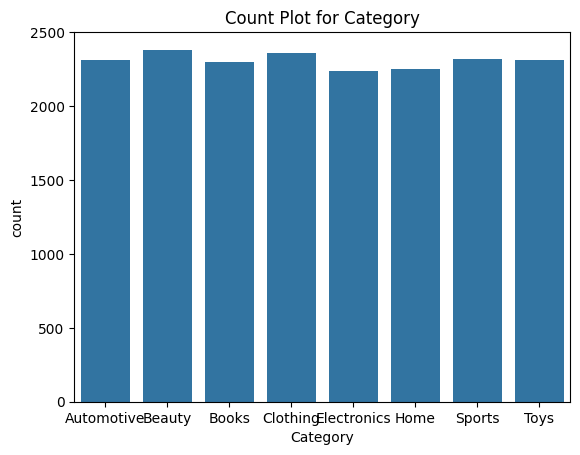

In [31]:
sn.countplot(x='Category', data=data)
pt.title('Count Plot for Category')
pt.show()

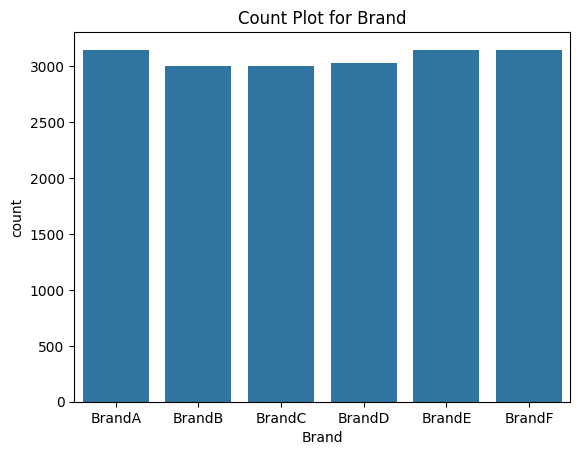

In [32]:
sn.countplot(x='Brand', data=data)
pt.title('Count Plot for Brand')
pt.show()

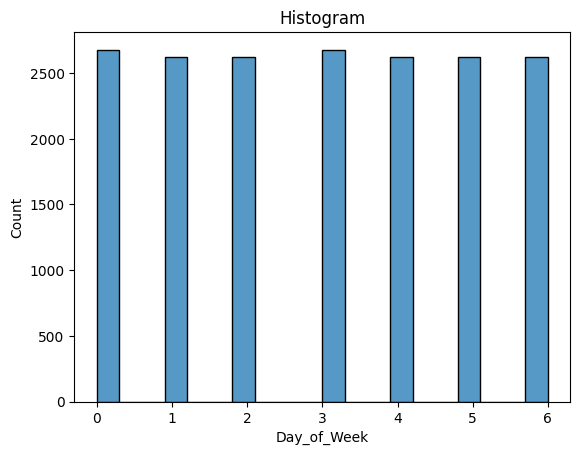

In [33]:
sn.histplot(data["Day_of_Week"], kde=False)
pt.title('Histogram')
pt.show()

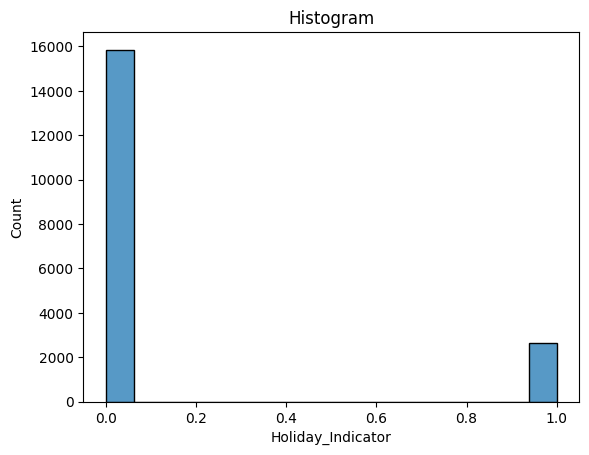

In [34]:
sn.histplot(data["Holiday_Indicator"], kde=False)
pt.title('Histogram')
pt.show()

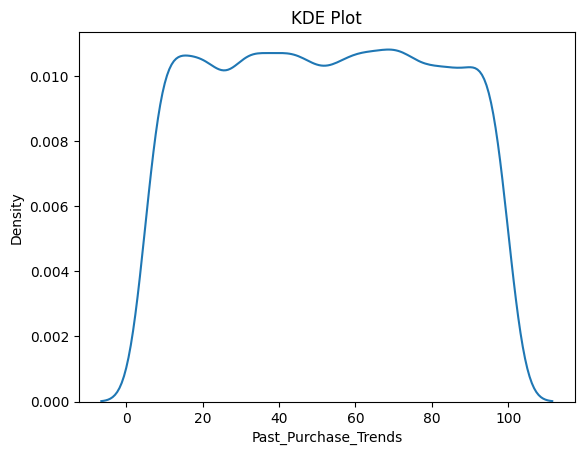

In [35]:
sn.kdeplot(data["Past_Purchase_Trends"])
pt.title('KDE Plot')
pt.show()

Bivariate Analysis

In [36]:
data.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,year,month,day,quarter,is_month_start,is_month_end,is_year_end,Difference
0,2024-09-26,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0,2024,9,26,3,False,False,False,102.85
1,2024-09-26,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0,2024,9,26,3,False,False,False,271.81
2,2024-09-26,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0,2024,9,26,3,False,False,False,-170.26
3,2024-09-26,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0,2024,9,26,3,False,False,False,325.04
4,2024-09-22,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0,2024,9,22,3,False,False,False,-256.31


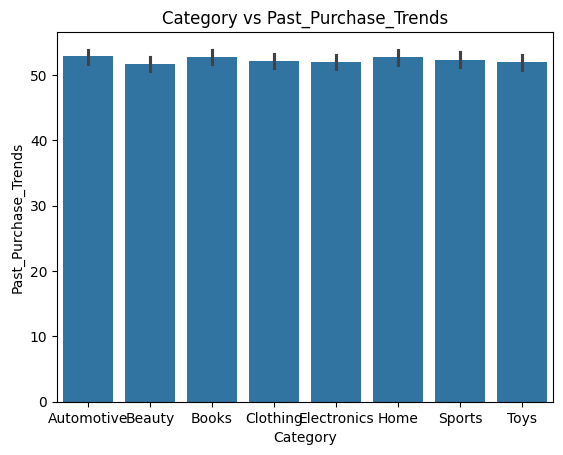

In [37]:
sn.barplot(x=data["Category"], y=data["Past_Purchase_Trends"])
pt.title('Category vs Past_Purchase_Trends')
pt.show()

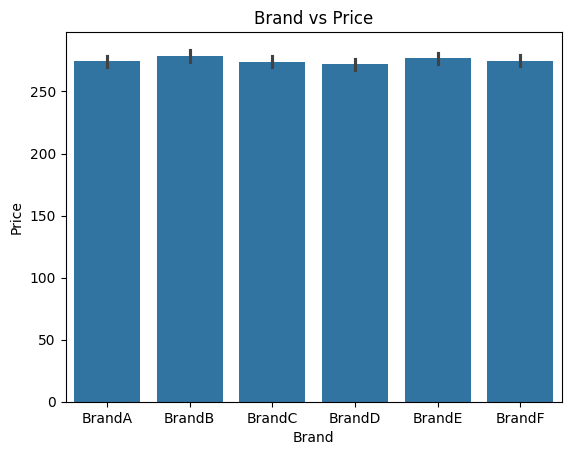

In [38]:
sn.barplot(x=data["Brand"], y=data["Price"])
pt.title('Brand vs Price')
pt.show()

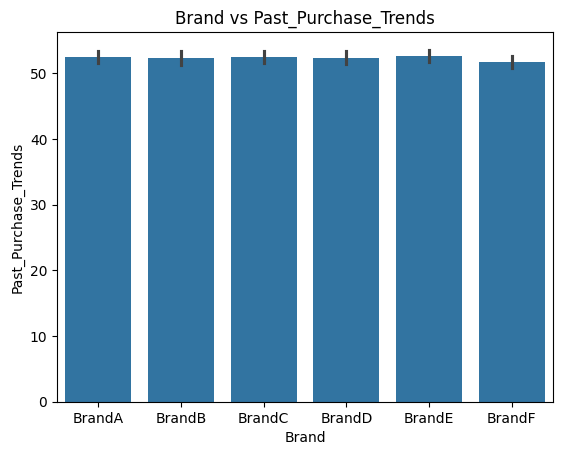

In [39]:
sn.barplot(x=data["Brand"], y=data["Past_Purchase_Trends"])
pt.title('Brand vs Past_Purchase_Trends')
pt.show()

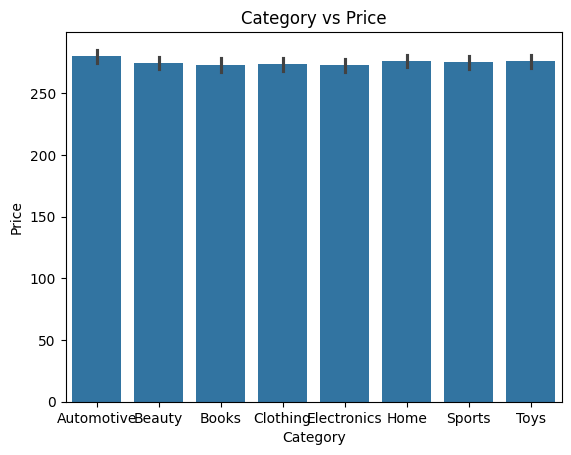

In [40]:
sn.barplot(x=data["Category"], y=data["Price"])
pt.title('Category vs Price')
pt.show()

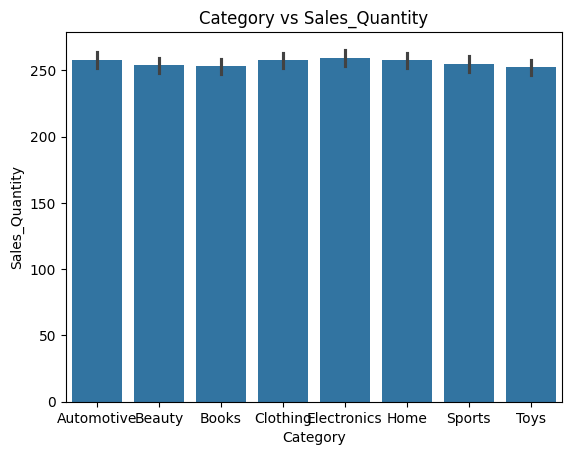

In [41]:
sn.barplot(x=data["Category"], y=data["Sales_Quantity"])
pt.title('Category vs Sales_Quantity')
pt.show()

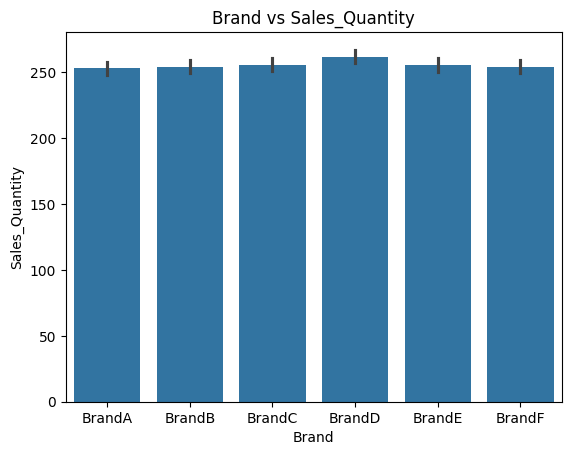

In [42]:
sn.barplot(x=data["Brand"], y=data["Sales_Quantity"])
pt.title('Brand vs Sales_Quantity')
pt.show()

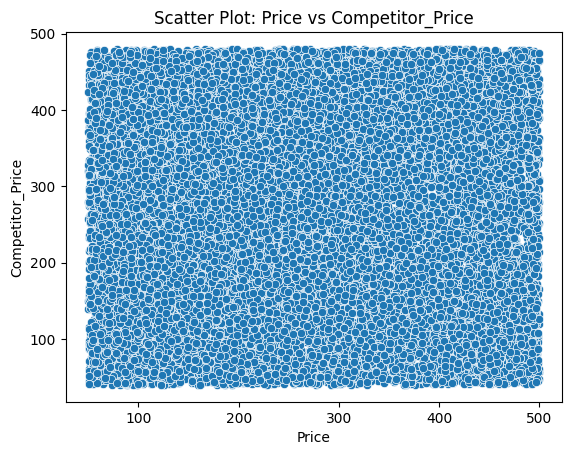

In [43]:
sn.scatterplot(x=data["Price"], y=data["Competitor_Price"])
pt.title('Scatter Plot: Price vs Competitor_Price')
pt.show()

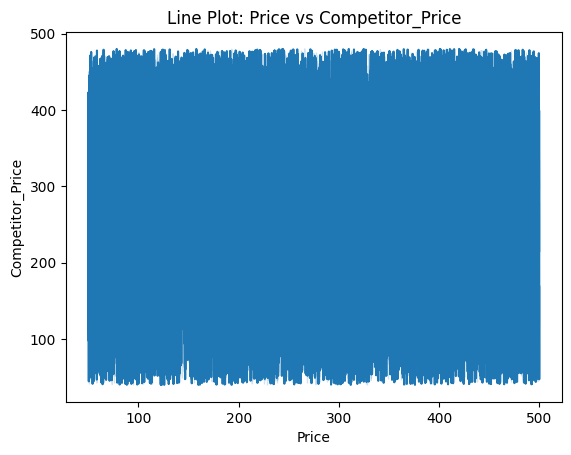

In [44]:
sn.lineplot(x=data["Price"], y=data["Competitor_Price"])
pt.title('Line Plot: Price vs Competitor_Price')
pt.show()

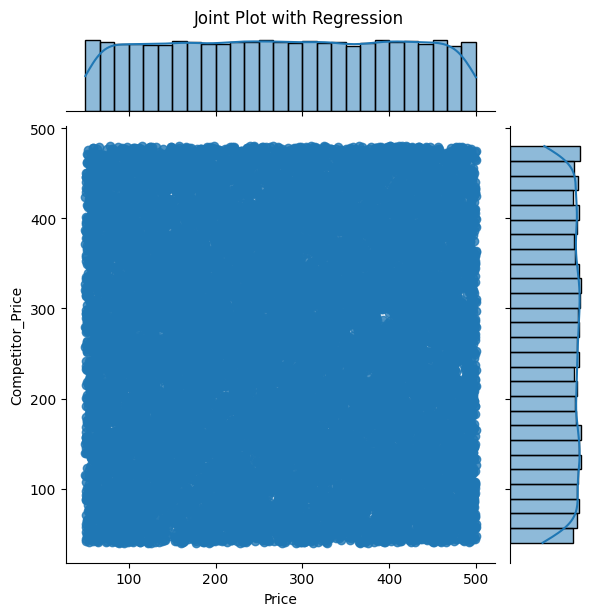

In [45]:
sn.jointplot(x=data["Price"], y=data["Competitor_Price"], kind='reg')
pt.suptitle('Joint Plot with Regression', y=1.02)
pt.show()

In [46]:
data.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,year,month,day,quarter,is_month_start,is_month_end,is_year_end,Difference
0,2024-09-26,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0,2024,9,26,3,False,False,False,102.85
1,2024-09-26,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0,2024,9,26,3,False,False,False,271.81
2,2024-09-26,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0,2024,9,26,3,False,False,False,-170.26
3,2024-09-26,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0,2024,9,26,3,False,False,False,325.04
4,2024-09-22,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0,2024,9,22,3,False,False,False,-256.31


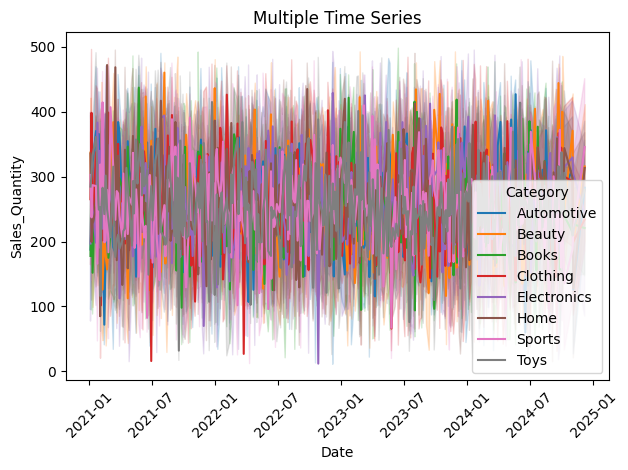

In [47]:
sn.lineplot(x='Date', y='Sales_Quantity', hue='Category', data=data)
pt.title('Multiple Time Series')
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

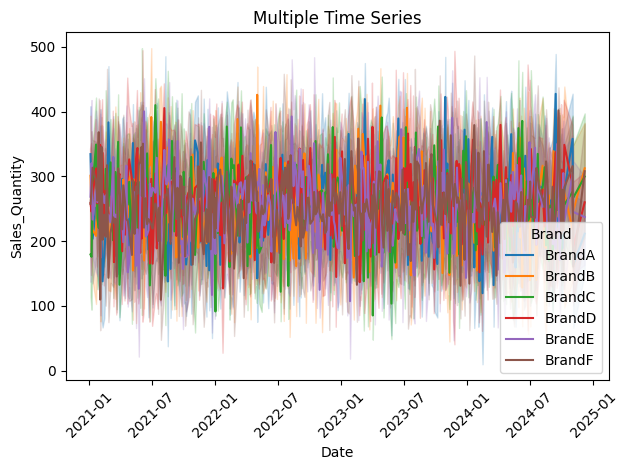

In [48]:
sn.lineplot(x='Date', y='Sales_Quantity', hue='Brand', data=data)
pt.title('Multiple Time Series')
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

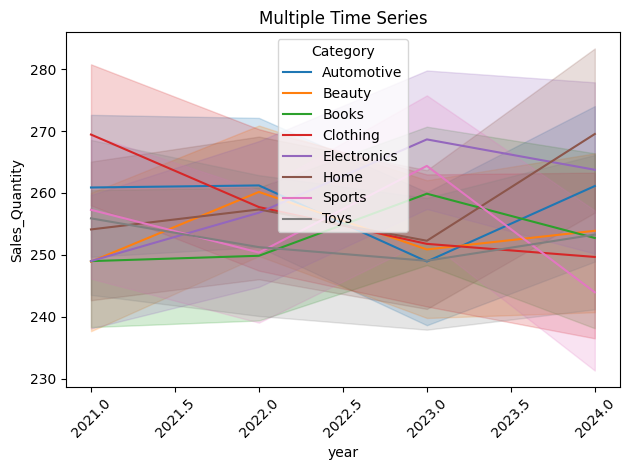

In [49]:
sn.lineplot(x='year', y='Sales_Quantity', hue='Category', data=data)
pt.title('Multiple Time Series')
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

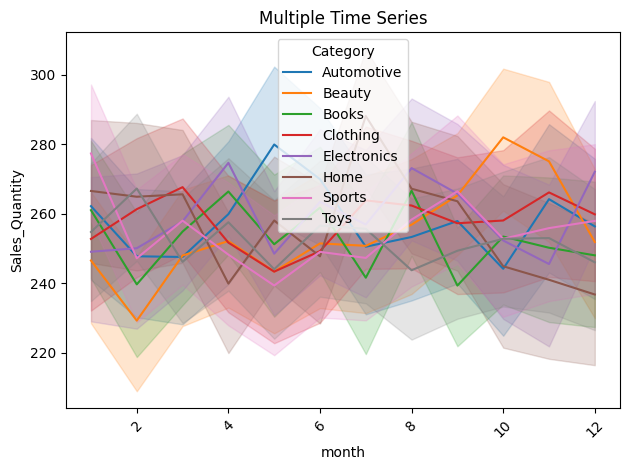

In [50]:
sn.lineplot(x='month', y='Sales_Quantity', hue='Category', data=data)
pt.title('Multiple Time Series')
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

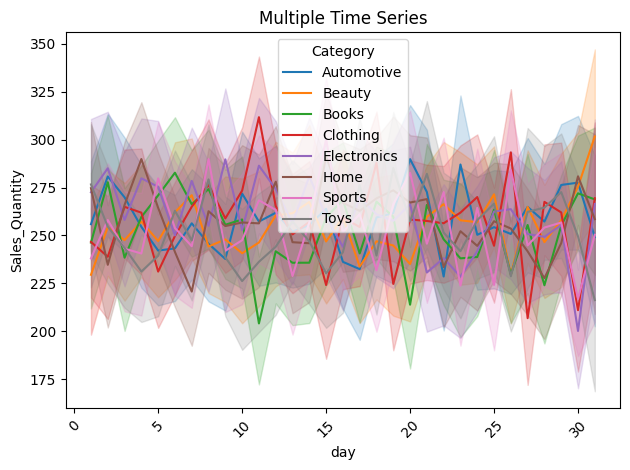

In [51]:
sn.lineplot(x='day', y='Sales_Quantity', hue='Category', data=data)
pt.title('Multiple Time Series')
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

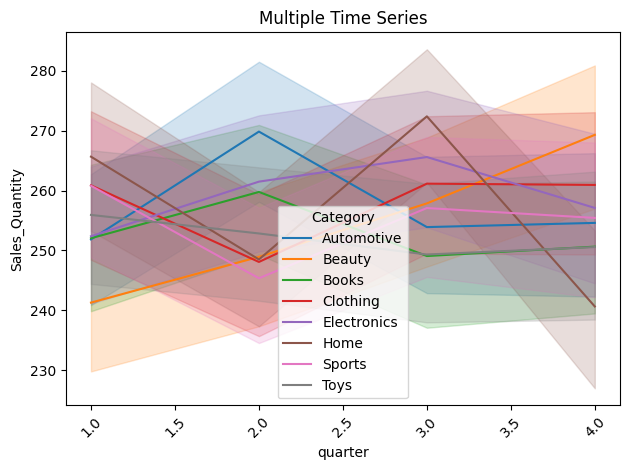

In [52]:
sn.lineplot(x='quarter', y='Sales_Quantity', hue='Category', data=data)
pt.title('Multiple Time Series')
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

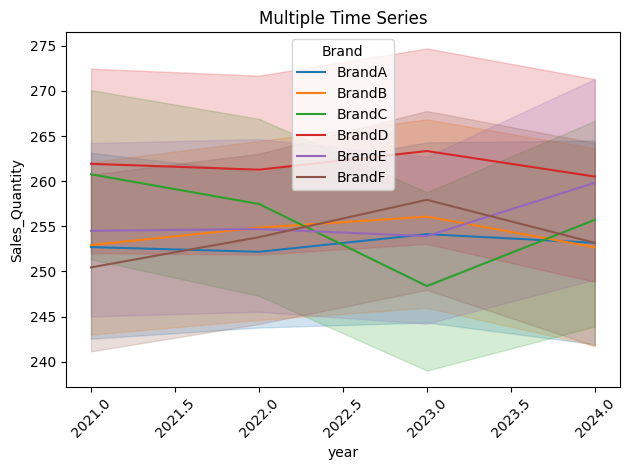

In [53]:
sn.lineplot(x='year', y='Sales_Quantity', hue='Brand', data=data)
pt.title('Multiple Time Series')
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

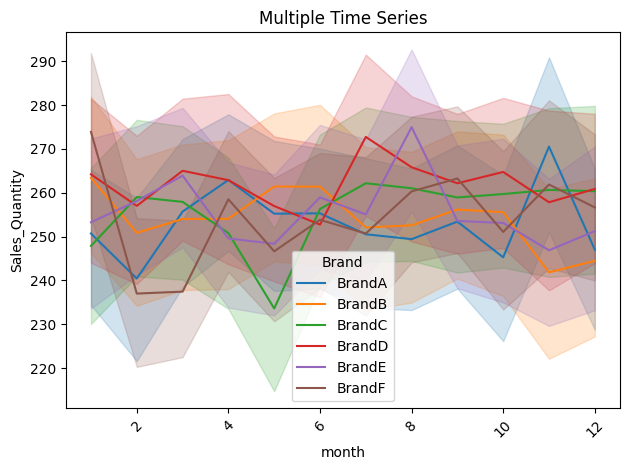

In [54]:
sn.lineplot(x='month', y='Sales_Quantity', hue='Brand', data=data)
pt.title('Multiple Time Series')
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

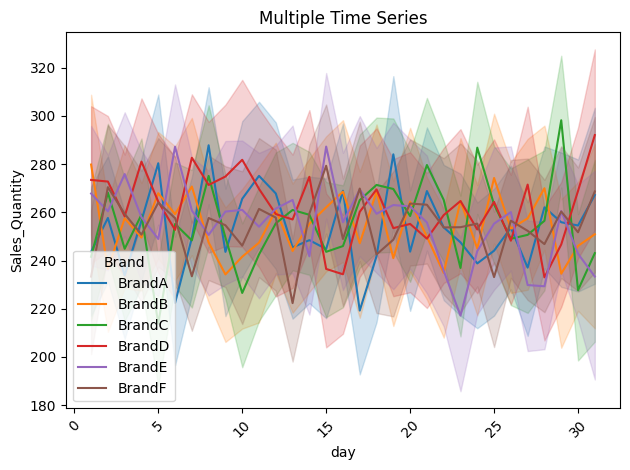

In [55]:
sn.lineplot(x='day', y='Sales_Quantity', hue='Brand', data=data)
pt.title('Multiple Time Series')
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

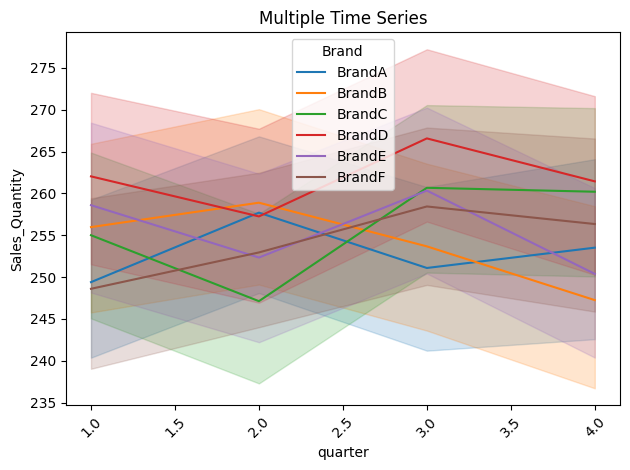

In [56]:
sn.lineplot(x='quarter', y='Sales_Quantity', hue='Brand', data=data)
pt.title('Multiple Time Series')
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

In [103]:
data.isna().sum()

Date                      0
Category                  0
Brand                     0
Day_of_Week               0
Holiday_Indicator         0
Past_Purchase_Trends      0
Price                     0
Discount                  0
Competitor_Price          0
Sales_Quantity          464
year                      0
month                     0
day                       0
quarter                   0
is_month_start            0
is_month_end              0
is_year_end               0
Difference                0
dtype: int64

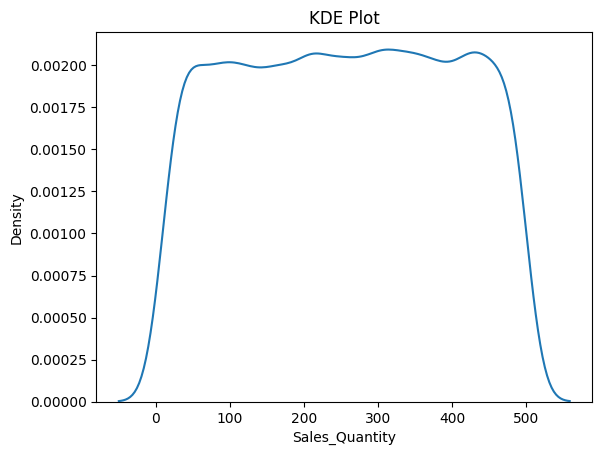

In [58]:
sn.kdeplot(data['Sales_Quantity'])
pt.title('KDE Plot')
pt.show()

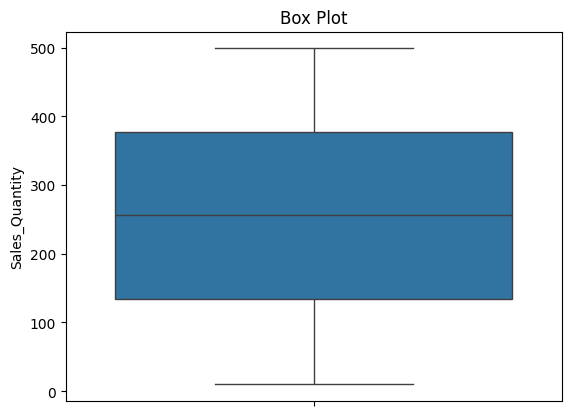

In [59]:
sn.boxplot(data['Sales_Quantity'])
pt.title('Box Plot')
pt.show()

So, There's no outliers

In [104]:
data.fillna(data.median(numeric_only=True), inplace=True)

In [105]:
data.isna().sum()

Date                    0
Category                0
Brand                   0
Day_of_Week             0
Holiday_Indicator       0
Past_Purchase_Trends    0
Price                   0
Discount                0
Competitor_Price        0
Sales_Quantity          0
year                    0
month                   0
day                     0
quarter                 0
is_month_start          0
is_month_end            0
is_year_end             0
Difference              0
dtype: int64

In [62]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [64]:
result = seasonal_decompose(data["Sales_Quantity"], model='additive', period=365)

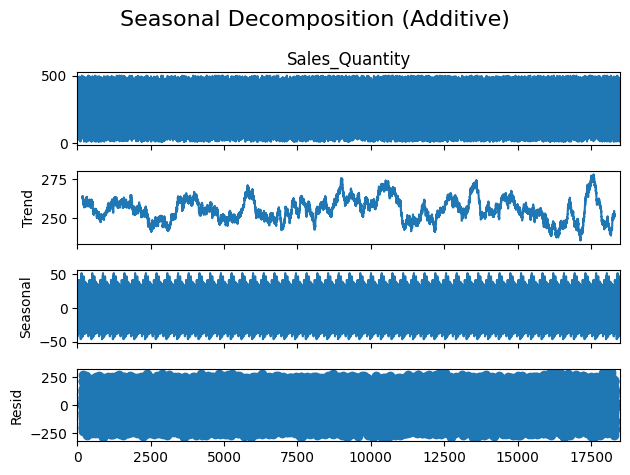

In [65]:
result.plot()
pt.suptitle('Seasonal Decomposition (Additive)', fontsize=16)
pt.tight_layout()
pt.show()

In [66]:
result2 = seasonal_decompose(data["Sales_Quantity"], model='additive', period=7)

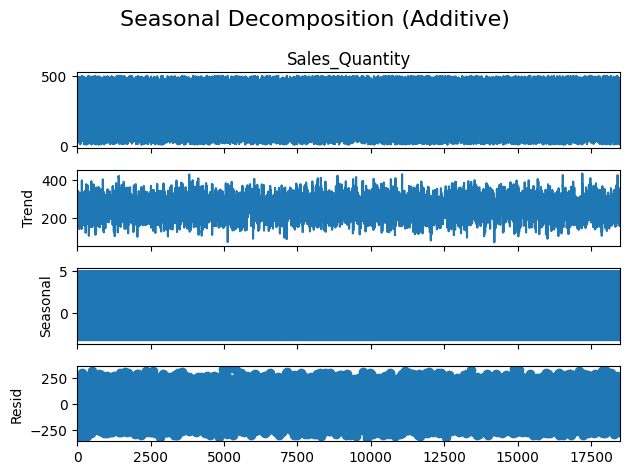

In [67]:
result2.plot()
pt.suptitle('Seasonal Decomposition (Additive)', fontsize=16)
pt.tight_layout()
pt.show()

In [68]:
data.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,year,month,day,quarter,is_month_start,is_month_end,is_year_end,Difference
0,2024-09-26,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0,2024,9,26,3,False,False,False,102.85
1,2024-09-26,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0,2024,9,26,3,False,False,False,271.81
2,2024-09-26,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0,2024,9,26,3,False,False,False,-170.26
3,2024-09-26,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0,2024,9,26,3,False,False,False,325.04
4,2024-09-22,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0,2024,9,22,3,False,False,False,-256.31


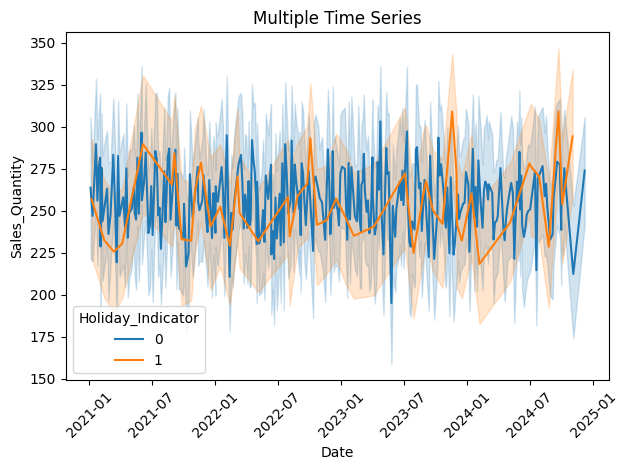

In [69]:
sn.lineplot(x='Date', y='Sales_Quantity', hue='Holiday_Indicator', data=data)
pt.title('Multiple Time Series')
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

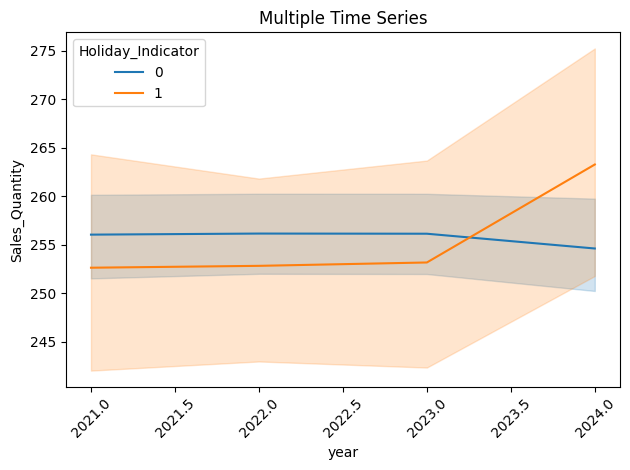

In [70]:
sn.lineplot(x='year', y='Sales_Quantity', hue='Holiday_Indicator', data=data)
pt.title('Multiple Time Series')
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

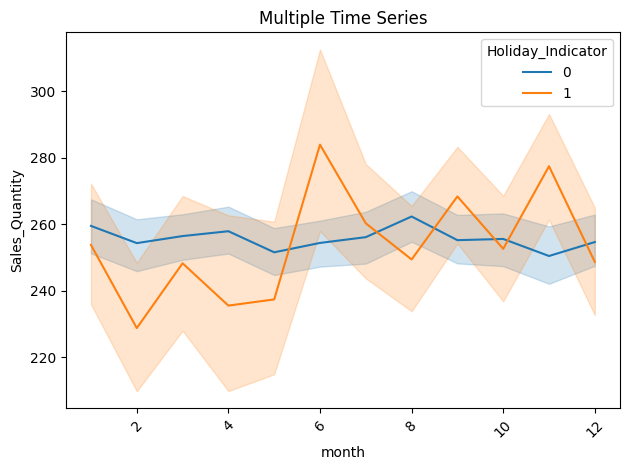

In [71]:
sn.lineplot(x='month', y='Sales_Quantity', hue='Holiday_Indicator', data=data)
pt.title('Multiple Time Series')
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

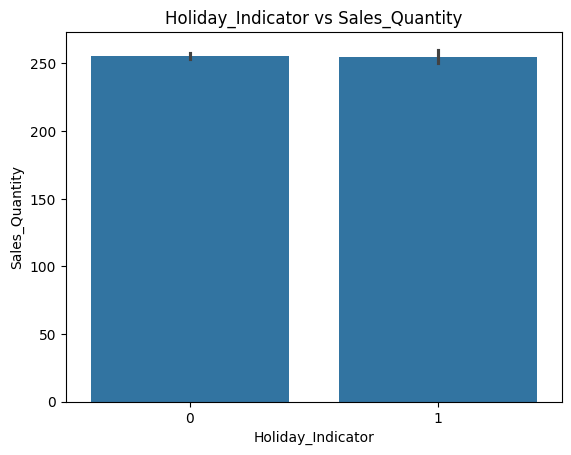

In [72]:
sn.barplot(x=data["Holiday_Indicator"], y=data["Sales_Quantity"])
pt.title('Holiday_Indicator vs Sales_Quantity')
pt.show()

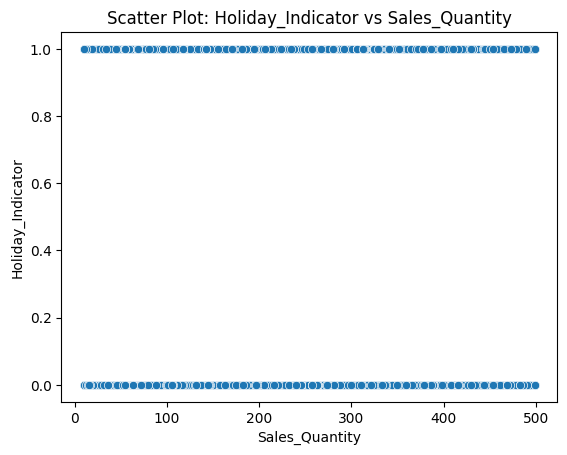

In [73]:
sn.scatterplot(x=data["Sales_Quantity"], y=data["Holiday_Indicator"])
pt.title('Scatter Plot: Holiday_Indicator vs Sales_Quantity')
pt.show()

Getting Feature Importance

In [106]:
data.drop(columns=[ "is_month_start", "is_month_end", "is_year_end"], inplace=True)

In [107]:
data.isna().sum()

Date                    0
Category                0
Brand                   0
Day_of_Week             0
Holiday_Indicator       0
Past_Purchase_Trends    0
Price                   0
Discount                0
Competitor_Price        0
Sales_Quantity          0
year                    0
month                   0
day                     0
quarter                 0
Difference              0
dtype: int64

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18483 non-null  datetime64[ns]
 1   Category              18483 non-null  object        
 2   Brand                 18483 non-null  object        
 3   Day_of_Week           18483 non-null  int64         
 4   Holiday_Indicator     18483 non-null  int64         
 5   Past_Purchase_Trends  18483 non-null  float64       
 6   Price                 18483 non-null  float64       
 7   Discount              18483 non-null  float64       
 8   Competitor_Price      18483 non-null  float64       
 9   Sales_Quantity        18483 non-null  float64       
 10  year                  18483 non-null  int32         
 11  month                 18483 non-null  int32         
 12  day                   18483 non-null  int32         
 13  quarter         

In [109]:
X = data.drop(columns=[ "Sales_Quantity", "Date"])

In [110]:
y = data["Sales_Quantity"]

In [111]:
X

,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,year,month,day,quarter,Difference
0,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,2024,9,26,3,102.85
1,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,2024,9,26,3,271.81
2,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,2024,9,26,3,-170.26
3,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,2024,9,26,3,325.04
4,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,2024,9,22,3,-256.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18478,Toys,BrandF,3,0,22.0,266.55,18.33,383.05,2021,2,18,1,-116.50
18479,Toys,BrandF,2,0,48.4,481.87,23.41,469.83,2021,10,2,4,12.04
18480,Toys,BrandF,1,0,50.7,123.81,46.73,214.11,2021,2,2,1,-90.30
18481,Toys,BrandF,0,0,73.4,77.95,10.07,82.28,2021,1,25,1,-4.33


In [112]:
y

0        227.0
1        370.0
2        299.0
3        426.0
4        470.0
         ...  
18478    359.0
18479    333.0
18480    132.0
18481    274.0
18482    350.0
Name: Sales_Quantity, Length: 18483, dtype: float64

In [117]:
X_enc = pd.get_dummies(X, columns=['Category', 'Brand'])

In [121]:
X_enc

,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,year,month,day,quarter,...,Category_Electronics,Category_Home,Category_Sports,Category_Toys,Brand_BrandA,Brand_BrandB,Brand_BrandC,Brand_BrandD,Brand_BrandE,Brand_BrandF
0,3,0,17.9,462.30,33.96,359.45,2024,9,26,3,...,False,False,False,False,True,False,False,False,False,False
1,3,0,66.3,321.28,24.76,49.47,2024,9,26,3,...,False,False,False,False,True,False,False,False,False,False
2,3,0,14.4,74.85,32.19,245.11,2024,9,26,3,...,False,False,False,False,True,False,False,False,False,False
3,3,0,34.7,469.12,43.68,144.08,2024,9,26,3,...,False,False,False,False,True,False,False,False,False,False
4,6,1,93.5,221.76,36.79,478.07,2024,9,22,3,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18478,3,0,22.0,266.55,18.33,383.05,2021,2,18,1,...,False,False,False,True,False,False,False,False,False,True
18479,2,0,48.4,481.87,23.41,469.83,2021,10,2,4,...,False,False,False,True,False,False,False,False,False,True
18480,1,0,50.7,123.81,46.73,214.11,2021,2,2,1,...,False,False,False,True,False,False,False,False,False,True
18481,0,0,73.4,77.95,10.07,82.28,2021,1,25,1,...,False,False,False,True,False,False,False,False,False,True


In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, random_state=42)

In [124]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [133]:
importances = model.feature_importances_
features = X_enc.columns

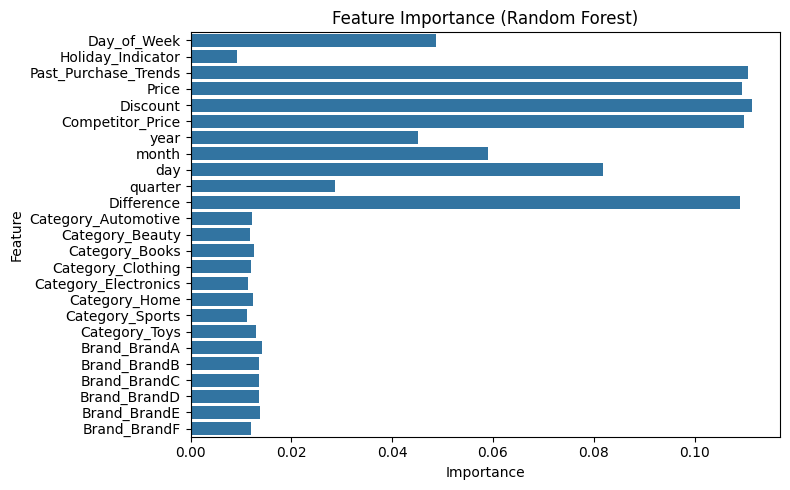

In [134]:
pt.figure(figsize=(8, 5))
sn.barplot(x=importances, y=features)
pt.title("Feature Importance (Random Forest)")
pt.xlabel("Importance")
pt.ylabel("Feature")
pt.tight_layout()
pt.show()

In [137]:
data

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,year,month,day,quarter,Difference
0,2024-09-26,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0,2024,9,26,3,102.85
1,2024-09-26,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0,2024,9,26,3,271.81
2,2024-09-26,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0,2024,9,26,3,-170.26
3,2024-09-26,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0,2024,9,26,3,325.04
4,2024-09-22,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0,2024,9,22,3,-256.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18478,2021-02-18,Toys,BrandF,3,0,22.0,266.55,18.33,383.05,359.0,2021,2,18,1,-116.50
18479,2021-10-02,Toys,BrandF,2,0,48.4,481.87,23.41,469.83,333.0,2021,10,2,4,12.04
18480,2021-02-02,Toys,BrandF,1,0,50.7,123.81,46.73,214.11,132.0,2021,2,2,1,-90.30
18481,2021-01-25,Toys,BrandF,0,0,73.4,77.95,10.07,82.28,274.0,2021,1,25,1,-4.33


In [139]:
data.drop(columns=["year", "month", "day", "quarter"], inplace=True)

In [140]:
data.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,Difference
0,2024-09-26,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0,102.85
1,2024-09-26,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0,271.81
2,2024-09-26,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0,-170.26
3,2024-09-26,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0,325.04
4,2024-09-22,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0,-256.31
